<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/time-series/LSTM_Long_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### Build the dataset
# This is a nonlinear and long distance dataset
# We will test long distance vs short distance patterns

# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

def get_label(X, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) # Short distance
  y = get_label(x,0,1,2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)



In [ ]:
# Try the linear model first. It's classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# train the network
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5
)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4861 - loss: 0.7996 - val_accuracy: 0.5084 - val_loss: 0.7009
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5420 - loss: 0.6920 - val_accuracy: 0.5168 - val_loss: 0.6961
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 0.6873 - val_accuracy: 0.5128 - val_loss: 0.6971
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 0.6930 - val_accuracy: 0.5108 - val_loss: 0.6994
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5205 - loss: 0.6951 - val_accuracy: 0.5040 - val_loss: 0.7020
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5464 - loss: 0.6913 - val_accuracy: 0.5072 - val_loss: 0.7011
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5612 - loss: 0.6871 - val_accuracy: 0.5036 - val_loss: 0.6984
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.6926 - val_accuracy: 0.5064 - v

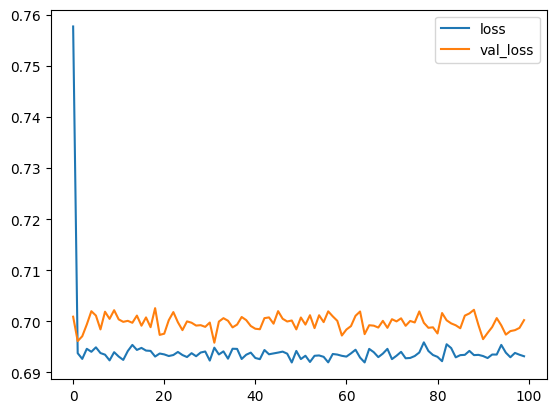

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

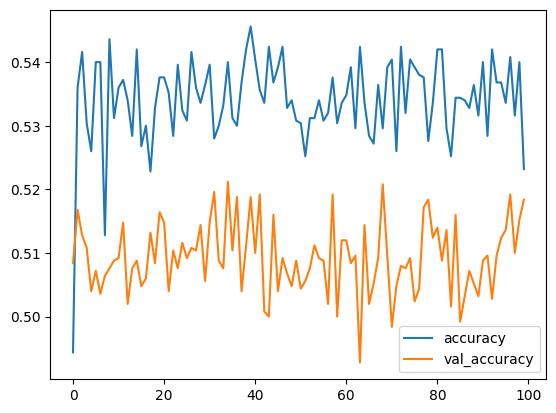

In [ ]:
# Plot the accuracy too. Should be around 50%
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
# Now trying a simple RNN
inputs = np.expand_dims(X,-1)

# Make the RNN
i = Input(shape=(T, D))

# Method 1
# x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# Method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    optimizer=Adam(learning_rate=0.01),
    # optimizer='adam',
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5069 - loss: 0.6952 - val_accuracy: 0.5064 - val_loss: 0.6930
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4933 - loss: 0.6937 - val_accuracy: 0.5012 - val_loss: 0.6929
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5104 - loss: 0.6935 - val_accuracy: 0.4960 - val_loss: 0.6938
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5004 - loss: 0.6937 - val_accuracy: 0.5048 - val_loss: 0.6929
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5064 - loss: 0.6944 - val_accuracy: 0.5052 - val_loss: 0.6933
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4939 - loss: 0.6949 - val_accuracy: 0.5012 - val_loss: 0.6929
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5239 - loss: 0.6929 - val_accuracy: 0.5016 - val_loss: 0.6929
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4750 - loss: 0.6934 - val_accuracy: 0.

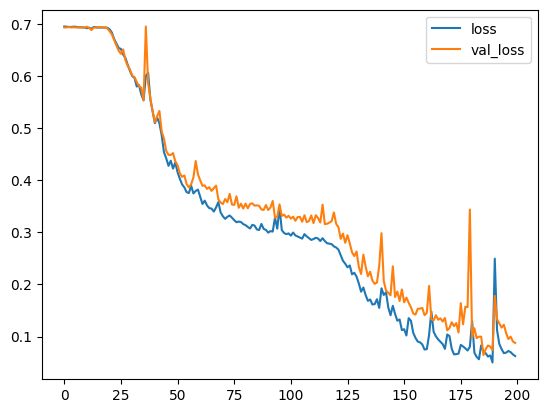

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

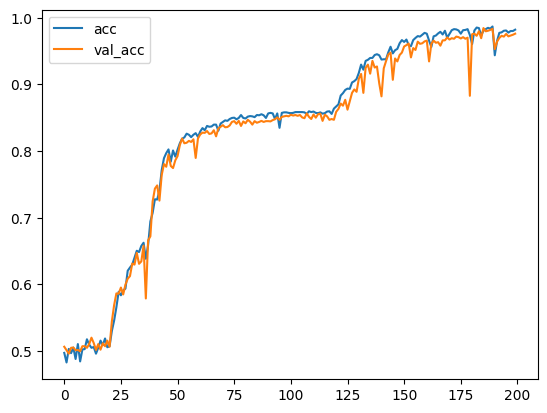

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()